In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
from prediction_helpers import *

In [3]:
ExE = pd.read_csv('../../extracted_data/ExE_imputed_5.csv', sep=',', index_col=0)
NxN = pd.read_csv('../../extracted_data/NxN_imputed_10.csv', sep=',', index_col=0)
ExN = pd.read_csv('../../extracted_data/ExN_filled_20.csv', sep=',', index_col=0)
embeddings = pd.read_csv('../../extracted_data/yeast_emb_embeddings_yeastnet_genex.csv', sep=',', index_col=0)
embeddings = embeddings.set_index('gene_id')

In [4]:
pca_linear_regression = Pipeline([
    ('pca', PCA(n_components=0.9)), 
    ('linear_regression', LinearRegression())
])
pca_linear_regression.name = 'PCA + Linear Regression'

predictive_models_ExE = [ 
    pca_linear_regression,
    Lasso(alpha=0.0001, max_iter=10000),
    Ridge(alpha=5, max_iter=10000),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

predictive_models_NxN = [ 
    pca_linear_regression,
    Lasso(alpha=0.00005, max_iter=10000),
    Ridge(alpha=10, max_iter=10000),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

predictive_models_ExN = [ 
    pca_linear_regression,
    Lasso(alpha=0.00005, max_iter=10000),
    Ridge(alpha=5, max_iter=10000),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

random.seed(35)
proportion = 0.01

## ExE


Model: Pipeline
Average R²:   -0.0167
Average RMSE: 0.0795

Model: Lasso
Average R²:   -0.0027
Average RMSE: 0.0759

Model: Ridge
Average R²:   -0.0039
Average RMSE: 0.0773

Model: RandomForestRegressor
Average R²:   0.2221
Average RMSE: 0.0687


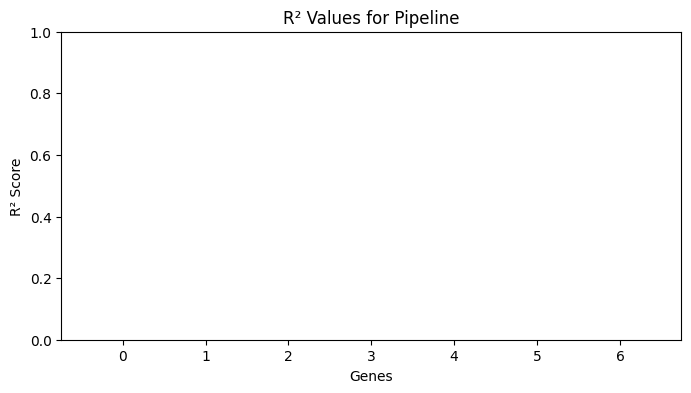

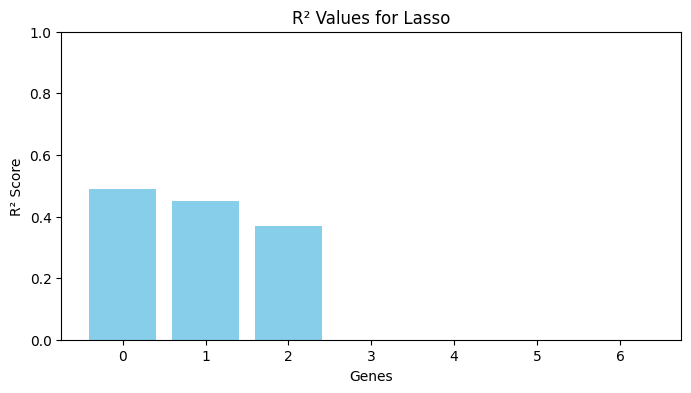

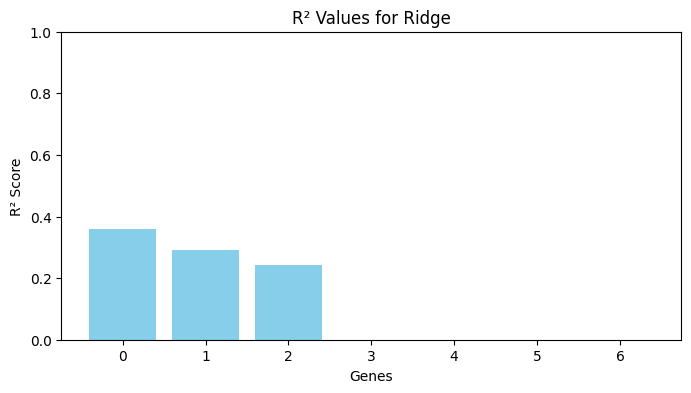

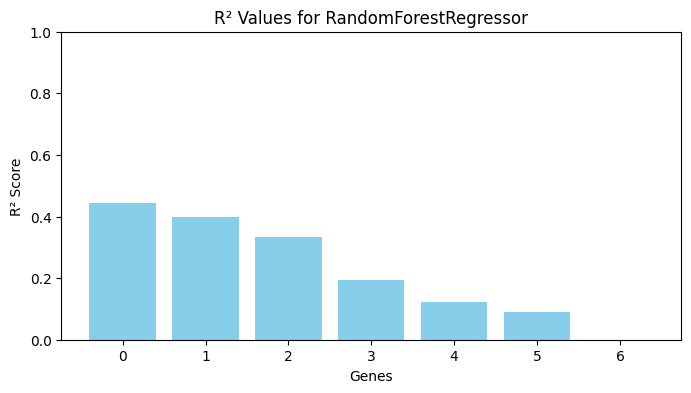

In [5]:
results_ExE = iterate_over_proportion_interactions_embeddings(ExE, embeddings, proportion, predictive_models_ExE)
print_results(results_ExE)
plot_results(results_ExE)

## NxN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Model: Pipeline
Average R²:   -0.0028
Average RMSE: 0.0418

Model: Lasso
Average R²:   0.1527
Average RMSE: 0.0370

Model: Ridge
Average R²:   0.0539
Average RMSE: 0.0396

Model: RandomForestRegressor
Average R²:   0.0287
Average RMSE: 0.0404


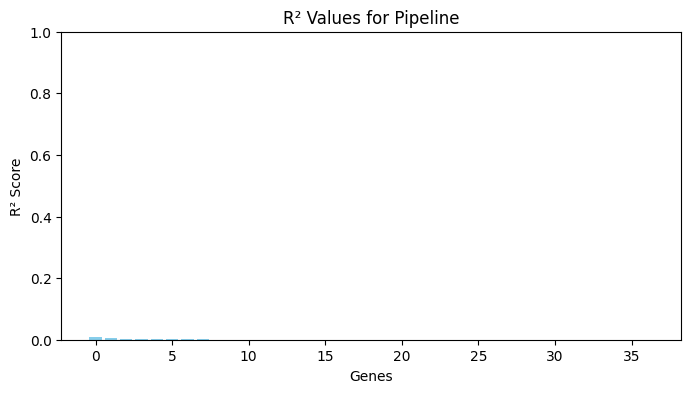

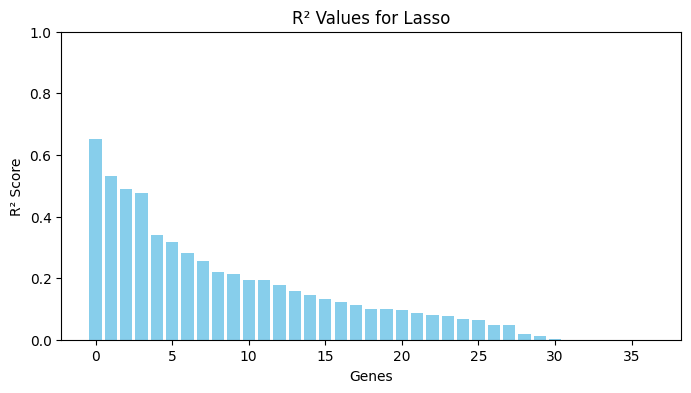

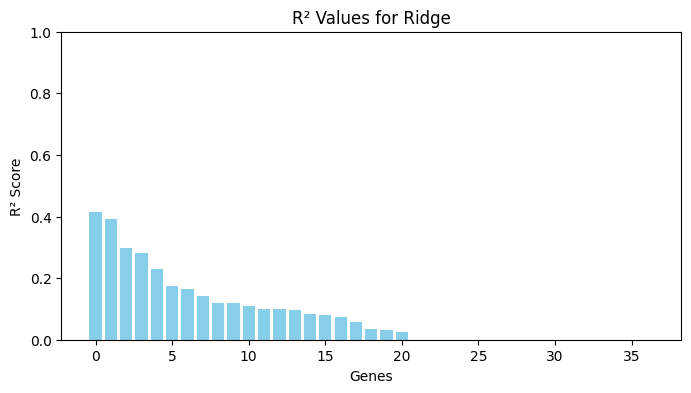

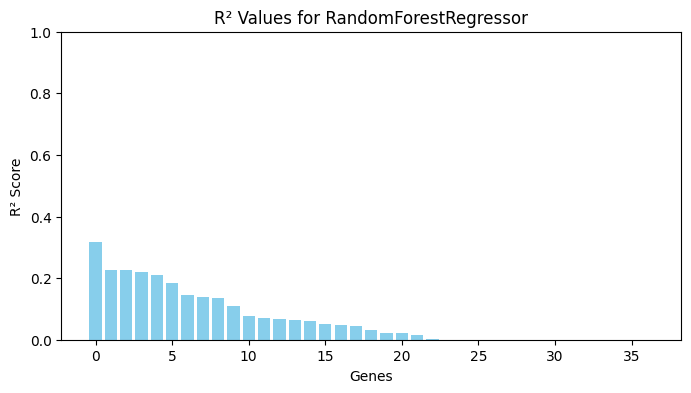

In [6]:
results_NxN = iterate_over_proportion_interactions_embeddings(NxN, embeddings, proportion, predictive_models_NxN)
print_results(results_NxN)
plot_results(results_NxN)

## ExN


Model: Pipeline
Average R²:   -0.0049
Average RMSE: 0.0462

Model: Lasso
Average R²:   0.0850
Average RMSE: 0.0431

Model: Ridge
Average R²:   -0.0960
Average RMSE: 0.0475

Model: RandomForestRegressor
Average R²:   0.1021
Average RMSE: 0.0432


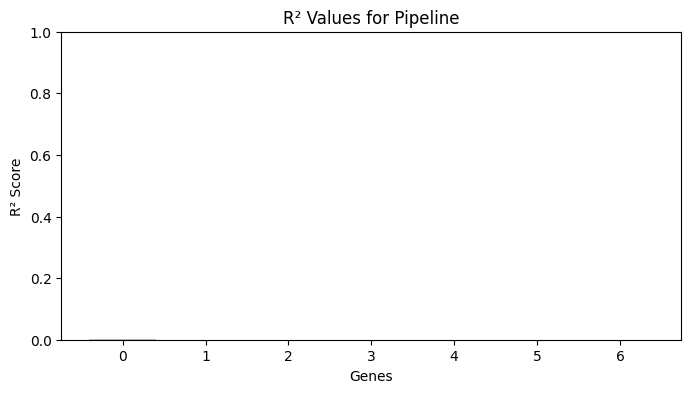

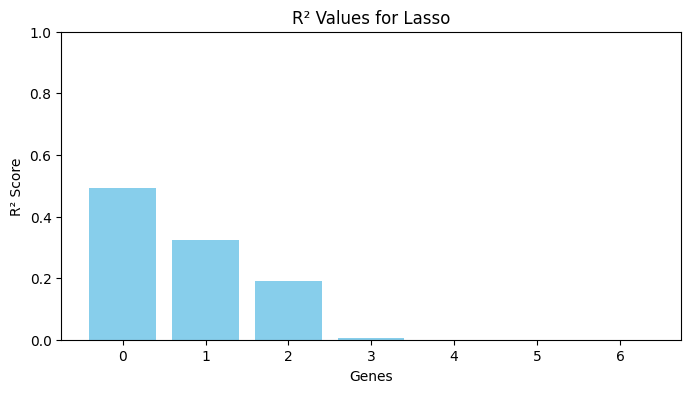

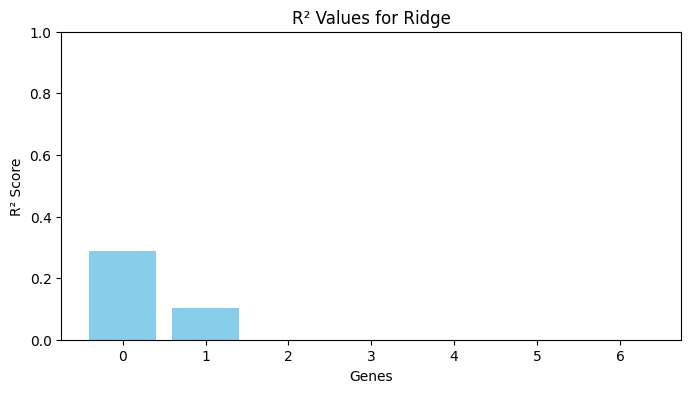

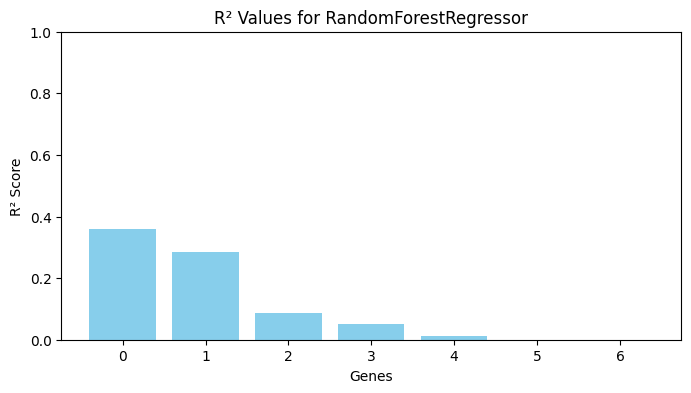

In [7]:
results_ExN = iterate_over_proportion_interactions_embeddings(ExN, embeddings, proportion, predictive_models_ExN)
print_results(results_ExN)
plot_results(results_ExN)


## Compilation Date

In [8]:
from datetime import datetime

now = datetime.now()
print(now.strftime("%Y-%m-%d %H:%M:%S"))

2025-05-13 16:43:11
